# **Analysis of Daily Food & Nutrition**


With the power of **data science and machine learning**, we can analyze daily food intake, track nutritional patterns, and even predict calorie consumption based on food composition.

In this notebook, we embark on a journey to clean, explore, and model food nutrition data, revealing hidden patterns and making predictions that could help in personalized diet planning.

In [52]:
# Essential libraries for data handling and model development
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tools from scikit-learn for preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# **01.Load Data**

In [53]:
rajat_df = pd.read_csv("daily_food_nutrition_dataset.csv")

In [54]:
display(rajat_df.head())

,Date,User_ID,Food_Item,Category,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Meal_Type,Water_Intake (ml)
0,2024-09-11,496,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,Lunch,478
1,2024-12-17,201,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,Lunch,466
2,2024-06-09,776,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,Breakfast,635
3,2024-08-27,112,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,Snack,379
4,2024-07-28,622,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,Lunch,471


# **02. Data Cleaning**

* Check for missing values
* Drop rows with missing values
* Check for duplicates
* Convert 'Date' column to datetime
* Remove outliers (Example: Calories above 3000 are considered outliers)

In [55]:
# Get a concise summary of data types
rajat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   User_ID            10000 non-null  int64  
 2   Food_Item          10000 non-null  object 
 3   Category           10000 non-null  object 
 4   Calories (kcal)    10000 non-null  int64  
 5   Protein (g)        10000 non-null  float64
 6   Carbohydrates (g)  10000 non-null  float64
 7   Fat (g)            10000 non-null  float64
 8   Fiber (g)          10000 non-null  float64
 9   Sugars (g)         10000 non-null  float64
 10  Sodium (mg)        10000 non-null  int64  
 11  Cholesterol (mg)   10000 non-null  int64  
 12  Meal_Type          10000 non-null  object 
 13  Water_Intake (ml)  10000 non-null  int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 1.1+ MB


In [56]:
# Check for missing values
print("Missing Values:\n", rajat_df.isnull().sum())

Missing Values:
 Date                 0
User_ID              0
Food_Item            0
Category             0
Calories (kcal)      0
Protein (g)          0
Carbohydrates (g)    0
Fat (g)              0
Fiber (g)            0
Sugars (g)           0
Sodium (mg)          0
Cholesterol (mg)     0
Meal_Type            0
Water_Intake (ml)    0
dtype: int64


In [57]:
# Drop rows with missing values
rajat_df.dropna(inplace=True)

In [58]:
# Check for duplicates
print(f'Number of duplicate rows: {rajat_df.duplicated().sum()}')
rajat_df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [59]:
# Convert 'Date' column to datetime
rajat_df['Date'] = pd.to_datetime(rajat_df['Date'])

In [60]:
# Remove outliers (Example: Calories above 3000 are considered outliers)
rajat_df = rajat_df[rajat_df['Calories (kcal)'] < 3000]

# **03. Exploratory Data Analysis (EDA)**

In [61]:
display(rajat_df.describe())

,Date,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2024-07-01 02:49:37.920000,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
min,2024-01-01 00:00:00,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,2024-04-02 00:00:00,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,2024-06-30 12:00:00,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,2024-09-29 00:00:00,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,2024-12-31 00:00:00,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000
std,NaN,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642


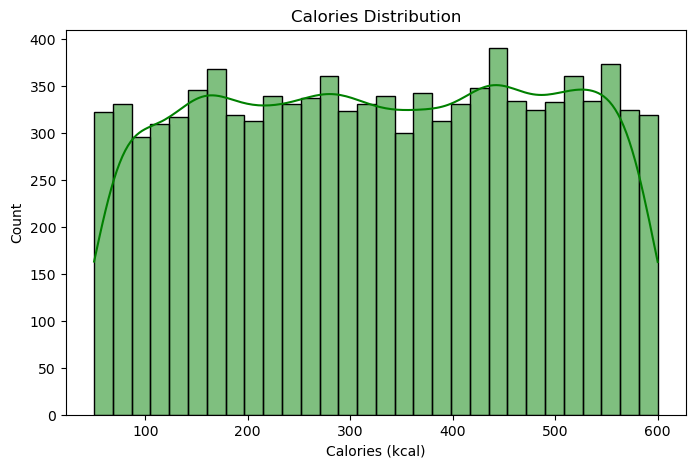

In [62]:
plt.figure(figsize=(8, 5))
rajat_df.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.histplot(rajat_df['Calories (kcal)'], bins=30, kde=True, color='green')
plt.title('Calories Distribution')
plt.xlabel('Calories (kcal)');plt.ylabel('Count')
plt.show()

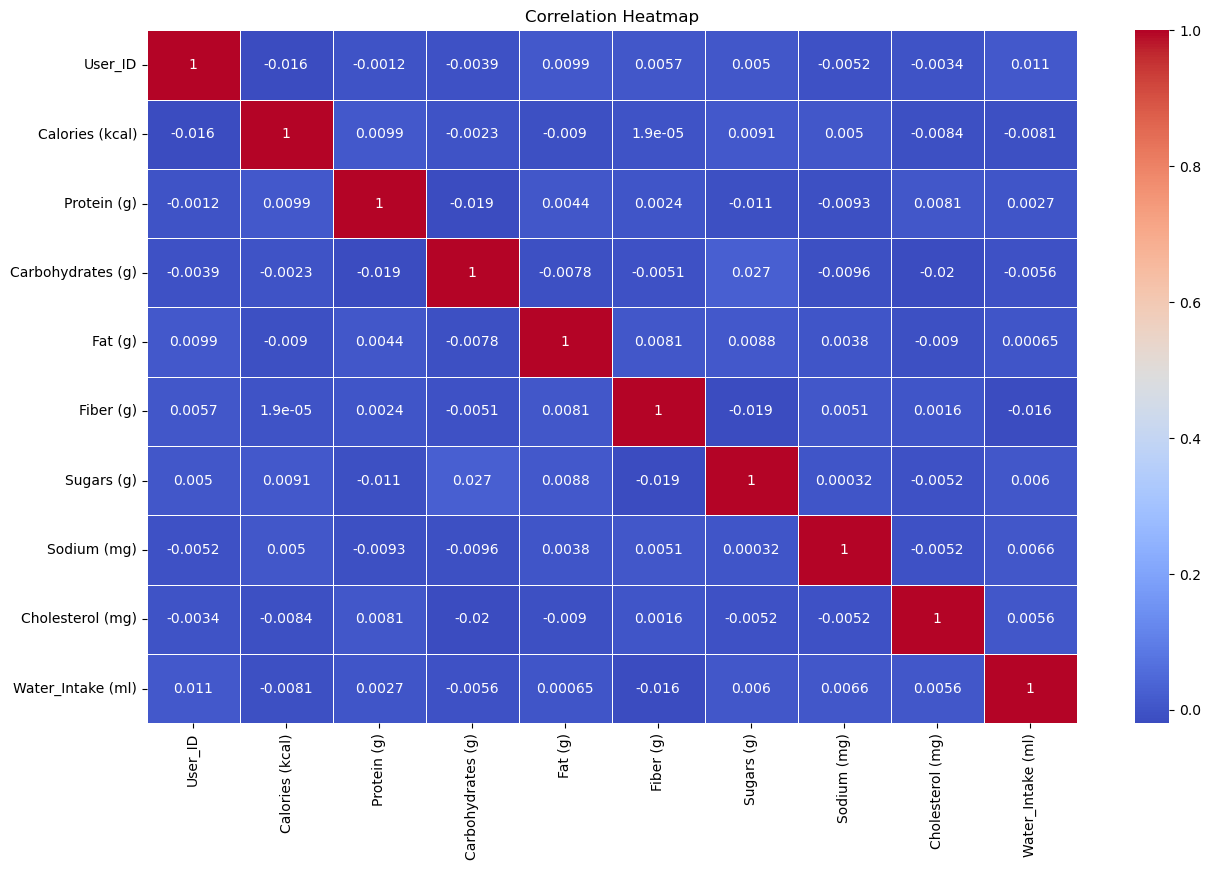

In [63]:
rajat_df_numeric = rajat_df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 9))
sns.heatmap(rajat_df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

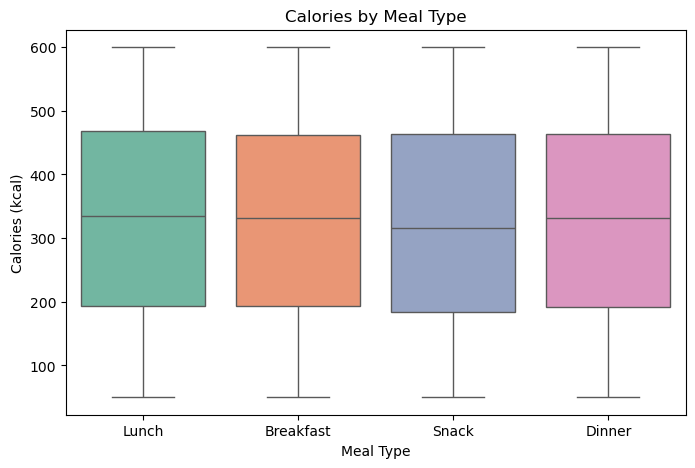

In [64]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Meal_Type', y='Calories (kcal)', data=rajat_df, palette='Set2')
plt.title('Calories by Meal Type')
plt.xlabel('Meal Type');plt.ylabel('Calories (kcal)')
plt.show()

# **04. Feature Engineering**

* **Encoding Categories:** We converted meal types and food categories into machine-readable numbers.

In [65]:
le = LabelEncoder()
rajat_df['Meal_Type'] = le.fit_transform(rajat_df['Meal_Type'])
rajat_df['Category'] = le.fit_transform(rajat_df['Category'])

* **Scaling Features:** Nutritional values were standardized to ensure balanced learning.

In [66]:
X = rajat_df[['Protein (g)', 'Carbohydrates (g)', 'Fat (g)', 'Fiber (g)', 'Sugars (g)', 'Sodium (mg)', 'Cholesterol (mg)', 'Meal_Type', 'Category']]
y = rajat_df['Calories (kcal)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* **Splitting Data:** We divided our dataset into training and test sets to evaluate performance.

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **05. Model Making**

I have used GridSearchCV to find the best Parameter of Random Forest Regressor 

In [68]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, scoring='r2',
                           n_jobs=-1, verbose=1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_model = grid_search.best_estimator_

# Evaluate the best model on test set
best_predictions = best_model.predict(X_test)

# Compute metrics
mae_best = mean_absolute_error(y_test, best_predictions)
mse_best = mean_squared_error(y_test, best_predictions)
r2_best = r2_score(y_test, best_predictions)

print("Best Parameters Found:", grid_search.best_params_)
print(f"MAE after tuning: {mae_best:.2f} kcal")
print(f"MSE after tuning: {mse_best:.2f} kcal²")
print(f"R² Score (Accuracy): {r2_best:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters Found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
MAE after tuning: 138.34 kcal
MSE after tuning: 25375.65 kcal²
R² Score (Accuracy): -0.0099


Now We know best Parameters so we have a model now

In [69]:
model = RandomForestRegressor(n_estimators=150,max_depth=10,min_samples_split=5,min_samples_leaf=1, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=150,
                      random_state=42)

In [70]:
r2 = r2_score(y_test, model.predict(X_test))
print(f"Tuned Model Accuracy (R² Score): {r2:.4f}")


Tuned Model Accuracy (R² Score): -0.0099


In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred

array([333.80800566, 345.95274479, 335.95747839, ..., 327.48563839,
       325.19157912, 310.13770138])

# **06. Model Evaluation**

* Mean Absolute Error (MAE): Measures how far off our predictions are.

In [73]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 138.34


* Mean Squared Error (MSE): Captures overall prediction errors.

In [74]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 25375.65


* R-Squared Score: Tells us how well the model explains the variation in calorie intake.

In [75]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

R-squared Score: -0.01


A scatter plot comparing actual vs predicted calorie values

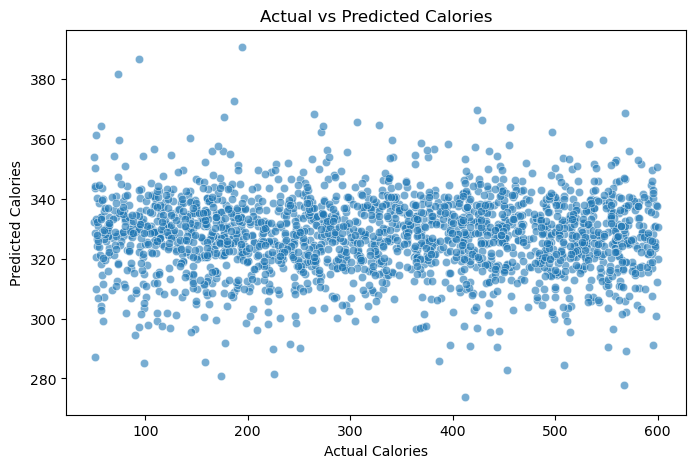

In [76]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Calories')
plt.ylabel('Predicted Calories')
plt.title('Actual vs Predicted Calories')
plt.show()

In [77]:
# Single sample input: [Protein, Carbs, Fat, Fiber, Sugars, Sodium, Cholesterol, Meal_Type, Category]
sample_input = np.array([39.2, 13.8, 3.2, 2.6, 12.2, 680, 97, 2, 2])

# Reshape to 2D array for scaler/model
sample_input_reshaped = sample_input.reshape(1, -1)

# Scale and predict
sample_input_scaled = scaler.transform(sample_input_reshaped)

In [78]:
# Predict using the trained model
predicted_calories = model.predict(sample_input_scaled)

In [79]:
print(f"Predicted Calories: {predicted_calories[0]:.2f} kcal")

Predicted Calories: 295.77 kcal


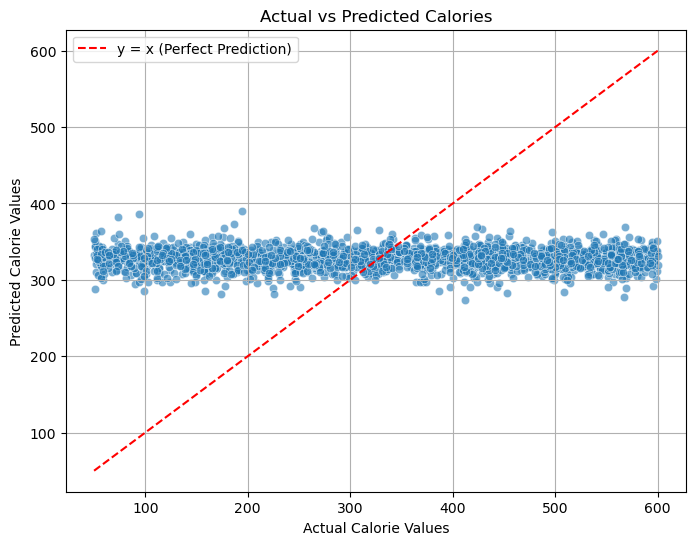

In [84]:
# Plot actual vs predicted calories with y = x reference line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x (Perfect Prediction)')
plt.xlabel('Actual Calorie Values')
plt.ylabel('Predicted Calorie Values')
plt.title('Actual vs Predicted Calories')
plt.legend()
plt.grid(True)
plt.show()


# **07. Web Site Making**

In [86]:
import joblib

# Save the trained model and the scaler
joblib.dump(model, 'calorie_model.pkl')  
joblib.dump(scaler, 'calorie_scaler.pkl')


['calorie_scaler.pkl']

**THIS IS THE APP.PY CODE**